In [96]:
# generate random floating point values
from random import seed
from random import random
from random import randint
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from itertools import chain
from collections import OrderedDict

In [97]:
nodes=[i for i in range(1,11)]
pairs = list(combinations(nodes, 2))
print(pairs)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (8, 9), (8, 10), (9, 10)]


In [98]:
n=len(nodes)
p=0.38
edge_list=list()

for i in pairs:
    gen_prob=randint(0,1)
    if gen_prob<p:
        edge_list.append(i)
    else:
        pass
print(edge_list)



[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (2, 9), (3, 4), (3, 7), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 8), (7, 9), (7, 10), (8, 10), (9, 10)]


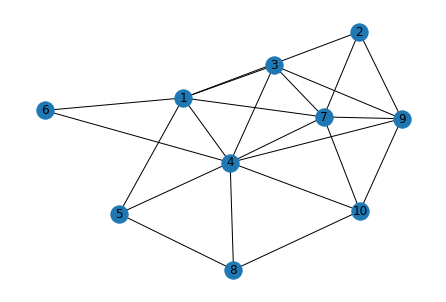

In [99]:
G = nx.Graph()

G.add_nodes_from(list(nodes))
G.add_edges_from(edge_list)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

{1: 6, 2: 3, 3: 4, 4: 8, 5: 3, 6: 2, 7: 6, 9: 5, 8: 3, 10: 4}


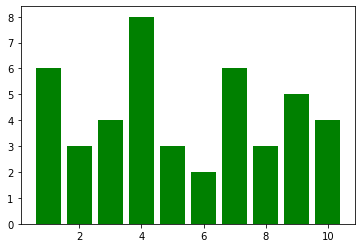

In [100]:
EdgeList = [i for j in edge_list for i in j]
def countX(EdgeList, x):
    return EdgeList.count(x)
dict_degree ={}

for x in EdgeList:
    case = {x:countX(EdgeList, x)}
    dict_degree.update(case)
#dict_degree = OrderedDict(sorted(dict_degree.items()))    
print(dict_degree)

plt.bar(dict_degree.keys(), dict_degree.values(), color='g')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 9, 8, 10]
[6, 3, 4, 8, 3, 2, 6, 5, 3, 4]
{1: 6, 2: 3, 3: 4, 4: 8, 5: 3, 6: 2, 7: 6, 9: 5, 8: 3, 10: 4}
[0.6, 0.3, 0.4, 0.8, 0.3, 0.2, 0.6, 0.5, 0.3, 0.4]


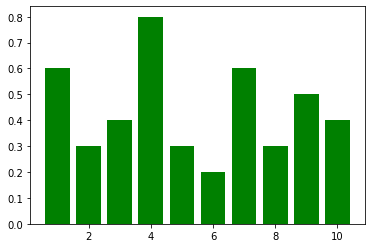

In [101]:
#degree_ditribution
links = dict_degree. keys() 
links_list = list(links)
print(links_list)

degrees = dict_degree. values() 
degrees_list = list(degrees) 
print(degrees_list)

print(dict_degree)

degrees = list()
for i in degrees_list: 
    degrees.append(i/n)
print(degrees)

plt.bar(links_list, degrees, color='g')
plt.show()



